In [17]:
pip install piaso-tools

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
path = '/data1/vallaris/Software/PIASO'
import sys
sys.path.append(path)
import piaso


In [49]:
import cosg
import scanpy as sc
import pandas as pd

adata=sc.read_h5ad("xd_tcga_labels_umap.h5ad")
n_gene = 10
print(adata.obs.columns)

cosg.cosg(adata,
          key_added='cosg',
          use_raw=False,
          mu=100,
          expressed_pct=0.1,  # Minimum fraction of cells expressing a gene
          remove_lowly_expressed=True,  # Exclude lowly expressed genes
          n_genes_user=10,
          groupby="labels",
           # Selects the top 100 marker genes per cluster
          )  # Groups based on the Leiden clustering method


Index(['labels', 'labels_with_juxta'], dtype='object')


/home/nisma/.local/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/home/nisma/.local/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/nisma/.local/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obse

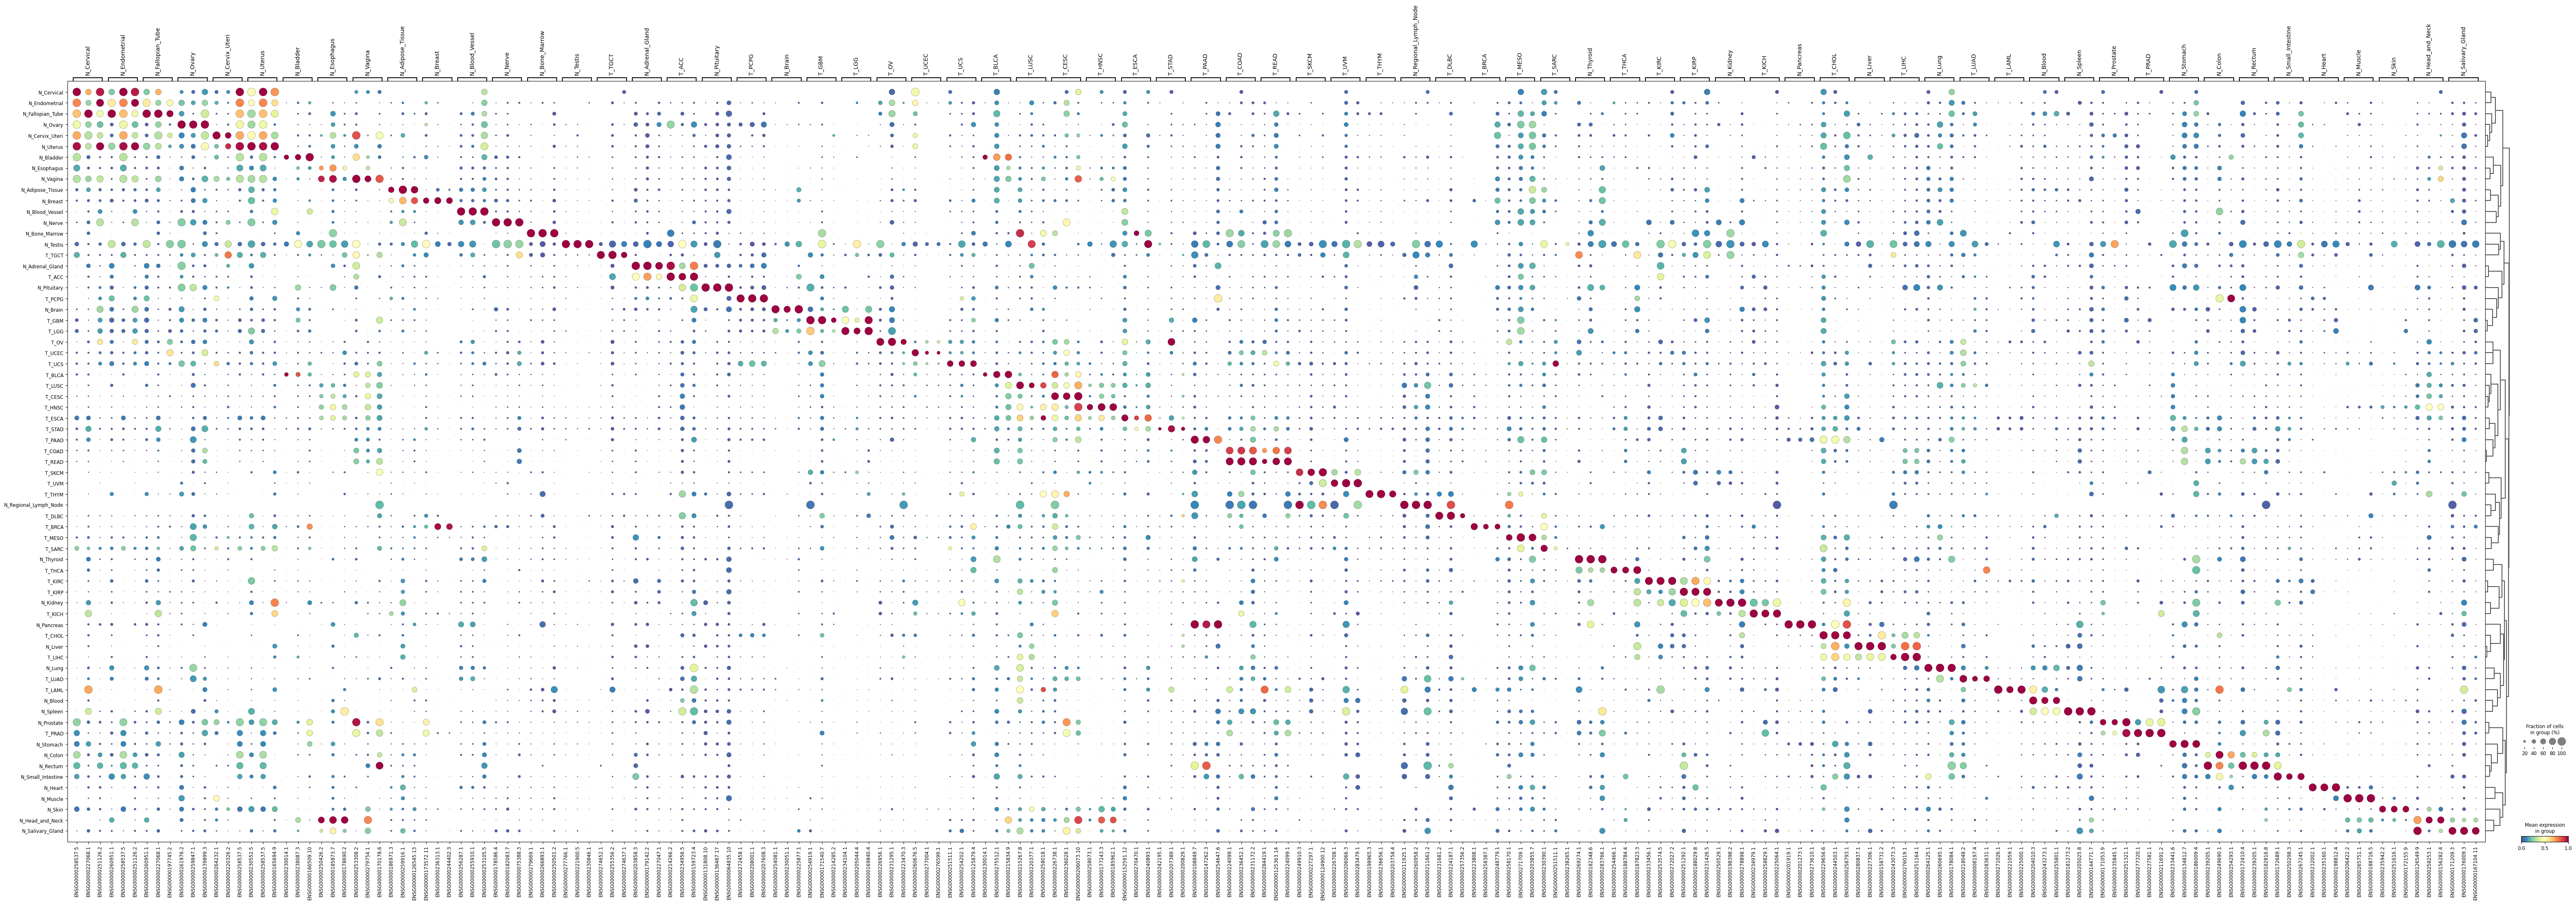

In [50]:
sc.tl.dendrogram(adata, groupby="labels", use_rep='X_pca') ## Change use_rep to the cell embeddings key you'd like to use
df_tmp=pd.DataFrame(adata.uns['cosg']['names'][:3,]).T
df_tmp=df_tmp.reindex(adata.uns['dendrogram_'+'labels']['categories_ordered'])
marker_genes_list={idx: list(row.values) for idx, row in df_tmp.iterrows()}
marker_genes_list = {k: v for k, v in marker_genes_list.items() if not any(isinstance(x, float) for x in v)}

sc.pl.dotplot(
   adata,
   marker_genes_list,
   groupby='labels',
   dendrogram=True,
   swap_axes=False,
   standard_scale='var',
   cmap='Spectral_r'
 )

In [51]:
marker_gene=pd.DataFrame(adata.uns['cosg']['names'])
marker_gene.head()

N_Adipose_Tissue    N_Adrenal_Gland           N_Bladder  \
0   ENSG00000186971.3  ENSG00000203858.3   ENSG00000230014.1   
1   ENSG00000259916.1  ENSG00000179142.2   ENSG00000238087.3   
2  ENSG00000126545.13  ENSG00000227047.1  ENSG00000166509.10   
3   ENSG00000268714.4  ENSG00000229928.1   ENSG00000242317.1   
4   ENSG00000248300.1  ENSG00000279525.1   ENSG00000275512.1   

             N_Blood     N_Blood_Vessel      N_Bone_Marrow            N_Brain  \
0  ENSG00000204010.3  ENSG00000256287.1  ENSG00000279669.1  ENSG00000254081.1   
1  ENSG00000243273.1  ENSG00000255910.1  ENSG00000266893.1  ENSG00000230051.1   
2  ENSG00000255801.1  ENSG00000253105.5  ENSG00000250501.2  ENSG00000225877.1   
3  ENSG00000248385.7  ENSG00000254278.1  ENSG00000264334.1  ENSG00000261710.1   
4  ENSG00000264257.1  ENSG00000226409.2  ENSG00000258125.1  ENSG00000279090.1   

             N_Breast         N_Cervical     N_Cervix_Uteri  ...  \
0  ENSG00000173572.11  ENSG00000258537.5  ENSG00000264232.1  ...   
1   ENSG00000236313.1  ENSG00000227068.1  ENSG00000220326.2  ...   
2   ENSG00000244402.3  ENSG00000251126.2  ENSG00000258537.5  ...   
3   ENSG00000252621.1  ENSG00000259737.6  ENSG00000233693.1  ...   
4   ENSG00000235687.8  ENSG00000163792.6  ENSG00000228874.1  ...   

               T_READ             T_SARC              T_SKCM  \
0   ENSG00000284419.1  ENSG00000230390.1   ENSG00000249910.3   
1  ENSG00000125363.14  ENSG00000251511.1   ENSG00000227297.1   
2   ENSG00000224099.1  ENSG00000238265.1  ENSG00000124900.12   
3   ENSG00000231172.2  ENSG00000258235.1   ENSG00000261364.1   
4   ENSG00000101074.3  ENSG00000271216.1   ENSG00000174914.1   

              T_STAD             T_TGCT              T_THCA  \
0  ENSG00000242195.1  ENSG00000274652.1   ENSG00000254466.1   
1  ENSG00000207389.1  ENSG00000255356.2   ENSG00000188784.4   
2  ENSG00000200829.1  ENSG00000274637.1   ENSG00000187823.3   
3  ENSG00000238215.1  ENSG00000187569.2   ENSG00000278044.1   
4  ENSG00000224674.1  ENSG00000219445.2  ENSG00000124467.18   

              T_THYM             T_UCEC              T_UCS              T_UVM  
0  ENSG00000198965.3  ENSG00000260676.5  ENSG00000251511.1  ENSG00000226708.1  
1  ENSG00000236656.1  ENSG00000277004.1  ENSG00000254202.1  ENSG00000206066.3  
2  ENSG00000203758.4  ENSG00000276599.1  ENSG00000125879.4  ENSG00000283479.1  
3  ENSG00000222028.3  ENSG00000225869.4  ENSG00000106436.4  ENSG00000163081.2  
4  ENSG00000211828.1  ENSG00000225069.3  ENSG00000225826.1  ENSG00000105954.2  

[5 rows x 69 columns]

In [52]:
marker_gene['T_BRCA']

0    ENSG00000223808.1
1    ENSG00000258387.1
2    ENSG00000248779.1
3    ENSG00000258894.1
4    ENSG00000225537.1
5    ENSG00000261776.1
6    ENSG00000250418.1
7    ENSG00000279773.1
8    ENSG00000253937.1
9    ENSG00000181552.3
Name: T_BRCA, dtype: object

In [53]:
marker_gene_scores=pd.DataFrame(adata.uns['cosg']['scores'])
marker_gene_scores.head()

N_Adipose_Tissue  N_Adrenal_Gland  N_Bladder   N_Blood  N_Blood_Vessel  \
0          0.022870         0.049805   0.000123  0.060909        0.096722   
1          0.018449         0.043792   0.000087  0.059777        0.091182   
2          0.010836         0.042093   0.000045  0.050206        0.058560   
3          0.009494         0.036744   0.000044  0.045539        0.046651   
4          0.005414         0.023564   0.000042  0.043098        0.038400   

   N_Bone_Marrow   N_Brain  N_Breast  N_Cervical  N_Cervix_Uteri  ...  \
0       0.481548  0.057256  0.006391    0.000005        0.000053  ...   
1       0.313014  0.054859  0.002121    0.000002        0.000041  ...   
2       0.307152  0.053849  0.002059    0.000002        0.000027  ...   
3       0.292564  0.050623  0.001996    0.000002        0.000025  ...   
4       0.254142  0.049758  0.001812    0.000001        0.000023  ...   

     T_READ    T_SARC    T_SKCM    T_STAD    T_TGCT    T_THCA    T_THYM  \
0  0.001183  0.001974  0.173978  0.003545  0.376577  0.138522  0.343143   
1  0.001065  0.000954  0.157837  0.002735  0.185156  0.017189  0.312920   
2  0.001047  0.000658  0.129591  0.002730  0.101317  0.013275  0.215277   
3  0.000991  0.000544  0.088488  0.002687  0.081835  0.010698  0.037022   
4  0.000931  0.000462  0.065564  0.002425  0.069219  0.007722  0.031540   

     T_UCEC     T_UCS     T_UVM  
0  0.040277  0.001637  0.007173  
1  0.021590  0.000919  0.005170  
2  0.016372  0.000247  0.004132  
3  0.014299  0.000110  0.002802  
4  0.012363  0.000092  0.002630  

[5 rows x 69 columns]

In [54]:
df = pd.DataFrame(marker_gene_scores)
column_sums = df.sum()
print(column_sums)

N_Adipose_Tissue    0.092417
N_Adrenal_Gland     0.277663
N_Bladder           0.000506
N_Blood             0.415375
N_Blood_Vessel      0.409678
                      ...   
T_THCA              0.211005
T_THYM              0.984561
T_UCEC              0.162813
T_UCS               0.003361
T_UVM               0.030137
Length: 69, dtype: float32


In [ ]:
adata.write("xd_tcga_labels_umap_cosg.h5ad")

AttributeError: module 'anndata' has no attribute 'obs'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

signature_sizes = [1, 3, 10, 20]
n_runs = 10
results = {}

labels_all = adata.obs["labels"].values

# Loop through each signature size clearly
for size in signature_sizes:
    print(f"\n=== Signature Size: {size} ===")
    results[size] = {}
    
    # Clearly iterate over each label (one-vs-rest classification)
    for label in marker_gene.columns:
        print(f"\n→ Evaluating clearly: {label} vs Rest")

        # Select clearly top 'size' genes for the current label
        selected_genes = marker_gene[label].iloc[:size].tolist()

        # Ensure clearly no duplicates and find indices
        selected_genes = list(pd.unique(selected_genes))
        gene_indices = [np.where(adata.var_names == gene)[0][0] for gene in selected_genes]

        # Extract numeric expression data clearly
        X_subset = adata.X[:, gene_indices]
        X_subset = X_subset.toarray() if hasattr(X_subset, 'toarray') else X_subset

        # Create binary labels: 1 (current label), 0 (rest)
        y_binary = np.where(labels_all == label, 1, 0)

        # Ensure there are at least two samples clearly per class
        if sum(y_binary) < 2 or sum(y_binary == 0) < 2:
            print(f"Skipped clearly '{label}': Not enough samples.")
            continue

        mcc_scores = []

        # Clearly perform multiple runs for robustness
        for run in range(n_runs):
            X_train, X_test, y_train, y_test = train_test_split(
                X_subset, y_binary,
                test_size=0.3, stratify=y_binary, random_state=run
            )

            # Clearly train SVM classifier
            svm = SVC(kernel='linear', class_weight='balanced', random_state=run)
            svm.fit(X_train, y_train)

            # Evaluate clearly using MCC
            y_pred = svm.predict(X_test)
            mcc = matthews_corrcoef(y_test, y_pred)
            mcc_scores.append(mcc)

        mean_mcc = np.mean(mcc_scores)
        results[size][label] = mean_mcc
        print(f"Label '{label}', signature size {size} → Mean MCC over {n_runs} runs: {mean_mcc:.4f}")




=== Signature Size: 1 ===

→ Evaluating clearly: N_Adipose_Tissue vs Rest


/tmp/ipykernel_56766/2324103839.py:26: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  selected_genes = list(pd.unique(selected_genes))


Label 'N_Adipose_Tissue', signature size 1 → Mean MCC over 10 runs: 0.3808

→ Evaluating clearly: N_Adrenal_Gland vs Rest


/tmp/ipykernel_56766/2324103839.py:26: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  selected_genes = list(pd.unique(selected_genes))


Label 'N_Adrenal_Gland', signature size 1 → Mean MCC over 10 runs: 0.7722

→ Evaluating clearly: N_Bladder vs Rest


/tmp/ipykernel_56766/2324103839.py:26: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  selected_genes = list(pd.unique(selected_genes))


Label 'N_Bladder', signature size 1 → Mean MCC over 10 runs: 0.1206

→ Evaluating clearly: N_Blood vs Rest


/tmp/ipykernel_56766/2324103839.py:26: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  selected_genes = list(pd.unique(selected_genes))


Label 'N_Blood', signature size 1 → Mean MCC over 10 runs: 0.6801

→ Evaluating clearly: N_Blood_Vessel vs Rest


/tmp/ipykernel_56766/2324103839.py:26: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  selected_genes = list(pd.unique(selected_genes))


Label 'N_Blood_Vessel', signature size 1 → Mean MCC over 10 runs: 0.7801

→ Evaluating clearly: N_Bone_Marrow vs Rest


/tmp/ipykernel_56766/2324103839.py:26: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  selected_genes = list(pd.unique(selected_genes))


Label 'N_Bone_Marrow', signature size 1 → Mean MCC over 10 runs: 0.9828

→ Evaluating clearly: N_Brain vs Rest


/tmp/ipykernel_56766/2324103839.py:26: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  selected_genes = list(pd.unique(selected_genes))


Label 'N_Brain', signature size 1 → Mean MCC over 10 runs: 0.8669

→ Evaluating clearly: N_Breast vs Rest


/tmp/ipykernel_56766/2324103839.py:26: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  selected_genes = list(pd.unique(selected_genes))


Label 'N_Breast', signature size 1 → Mean MCC over 10 runs: 0.2860

→ Evaluating clearly: N_Cervical vs Rest


/tmp/ipykernel_56766/2324103839.py:26: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  selected_genes = list(pd.unique(selected_genes))


Label 'N_Cervical', signature size 1 → Mean MCC over 10 runs: 0.0846

→ Evaluating clearly: N_Cervix_Uteri vs Rest


/tmp/ipykernel_56766/2324103839.py:26: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  selected_genes = list(pd.unique(selected_genes))


Label 'N_Cervix_Uteri', signature size 1 → Mean MCC over 10 runs: 0.0766

→ Evaluating clearly: N_Colon vs Rest


/tmp/ipykernel_56766/2324103839.py:26: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  selected_genes = list(pd.unique(selected_genes))


Label 'N_Colon', signature size 1 → Mean MCC over 10 runs: 0.3405

→ Evaluating clearly: N_Endometrial vs Rest


/tmp/ipykernel_56766/2324103839.py:26: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  selected_genes = list(pd.unique(selected_genes))


Label 'N_Endometrial', signature size 1 → Mean MCC over 10 runs: 0.0739

→ Evaluating clearly: N_Esophagus vs Rest


/tmp/ipykernel_56766/2324103839.py:26: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  selected_genes = list(pd.unique(selected_genes))


In [46]:
import cosg
import scanpy as sc
import pandas as pd

adata=sc.read_h5ad("pbmc.h5ad")
n_gene = 10
print(adata.obs.columns)
cosg.cosg(adata,
          key_added='cosg',
          use_raw=False,
          mu=100,
          expressed_pct=0.1,  # Minimum fraction of cells expressing a gene
          remove_lowly_expressed=True,  # Exclude lowly expressed genes
          n_genes_user=10,
          groupby="label",
         # Selects the top 100 marker genes per cluster
          )  # Groups based on the Leiden clustering method


Index(['total_counts', 'label', 'lineage', 'id'], dtype='object')


In [47]:
marker_gene=pd.DataFrame(adata.uns['cosg']['names'])
marker_gene.head()

CD4 T CD14 Monocytes          B  CD8 T       NK FCGR3A Monocytes  \
0        MAL          FOLR3  LINC00926   GZMK   AKR1C3              CKB   
1  LINC00176         CLEC4E      CD79A   LAG3    RAMP1            LYPD2   
2       LEF1        S100A12     VPREB3   CD8A   SH2D1B           CDKN1C   
3       FHIT           CD14      TCL1A  KLRG1    FASLG             C1QA   
4      EPHX2           NRG1      FCER2   CCL5  KIR2DL3             VMO1   

  Dendritic Megakaryocytes  
0    FCER1A            GP9  
1  SERPINF1         ITGA2B  
2    CLEC4C         LY6G6F  
3     CLIC2          SEPT5  
4      ENHO         TMEM40

In [48]:
marker_gene_scores=pd.DataFrame(adata.uns['cosg']['scores'])
marker_gene_scores.head()

CD4 T  CD14 Monocytes         B     CD8 T        NK  FCGR3A Monocytes  \
0  0.211615        0.482055  0.632499  0.102982  0.265435          0.334698   
1  0.205622        0.344657  0.613813  0.042533  0.256102          0.218952   
2  0.116413        0.341138  0.611443  0.025660  0.227872          0.162118   
3  0.097668        0.334612  0.508798  0.014374  0.191683          0.151465   
4  0.090234        0.273978  0.465757  0.013731  0.181075          0.138763   

   Dendritic  Megakaryocytes  
0   0.476950        0.815334  
1   0.249133        0.803727  
2   0.198135        0.763557  
3   0.156992        0.736830  
4   0.125299        0.721452

In [27]:
adata.obsm['X_umap_backup']=adata.obsm['X_umap'].copy()
piaso.tl.runSVD(adata,
                   use_highly_variable=True,
                   n_components=50,
                   random_state=10,
                   key_added='X_svd')

sc.pp.neighbors(adata,
                use_rep='X_svd',
                n_neighbors=15,
                random_state=10,
                knn=True,
                method="umap")
sc.tl.umap(adata)


/home/nisma/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


/home/nisma/.local/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/home/nisma/.local/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/nisma/.local/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obse

                                  0                  1                  2
N_Adipose_Tissue  ENSG00000172288.7  ENSG00000270168.2  ENSG00000262152.6
N_Adrenal_Gland   ENSG00000172288.7  ENSG00000270168.2  ENSG00000262152.6
N_Bladder         ENSG00000172288.7  ENSG00000270168.2  ENSG00000262152.6
N_Blood           ENSG00000172288.7  ENSG00000270168.2  ENSG00000262152.6
N_Blood_Vessel    ENSG00000172288.7  ENSG00000270168.2  ENSG00000262152.6
...                             ...                ...                ...
T_THCA            ENSG00000172288.7  ENSG00000270168.2  ENSG00000262152.6
T_THYM            ENSG00000172288.7  ENSG00000270168.2  ENSG00000262152.6
T_UCEC            ENSG00000172288.7  ENSG00000270168.2  ENSG00000262152.6
T_UCS             ENSG00000172288.7  ENSG00000270168.2  ENSG00000262152.6
T_UVM             ENSG00000172288.7  ENSG00000270168.2  ENSG00000262152.6

[69 rows x 3 columns]
                                  0                  1                  2  \
N_Adipose_Ti

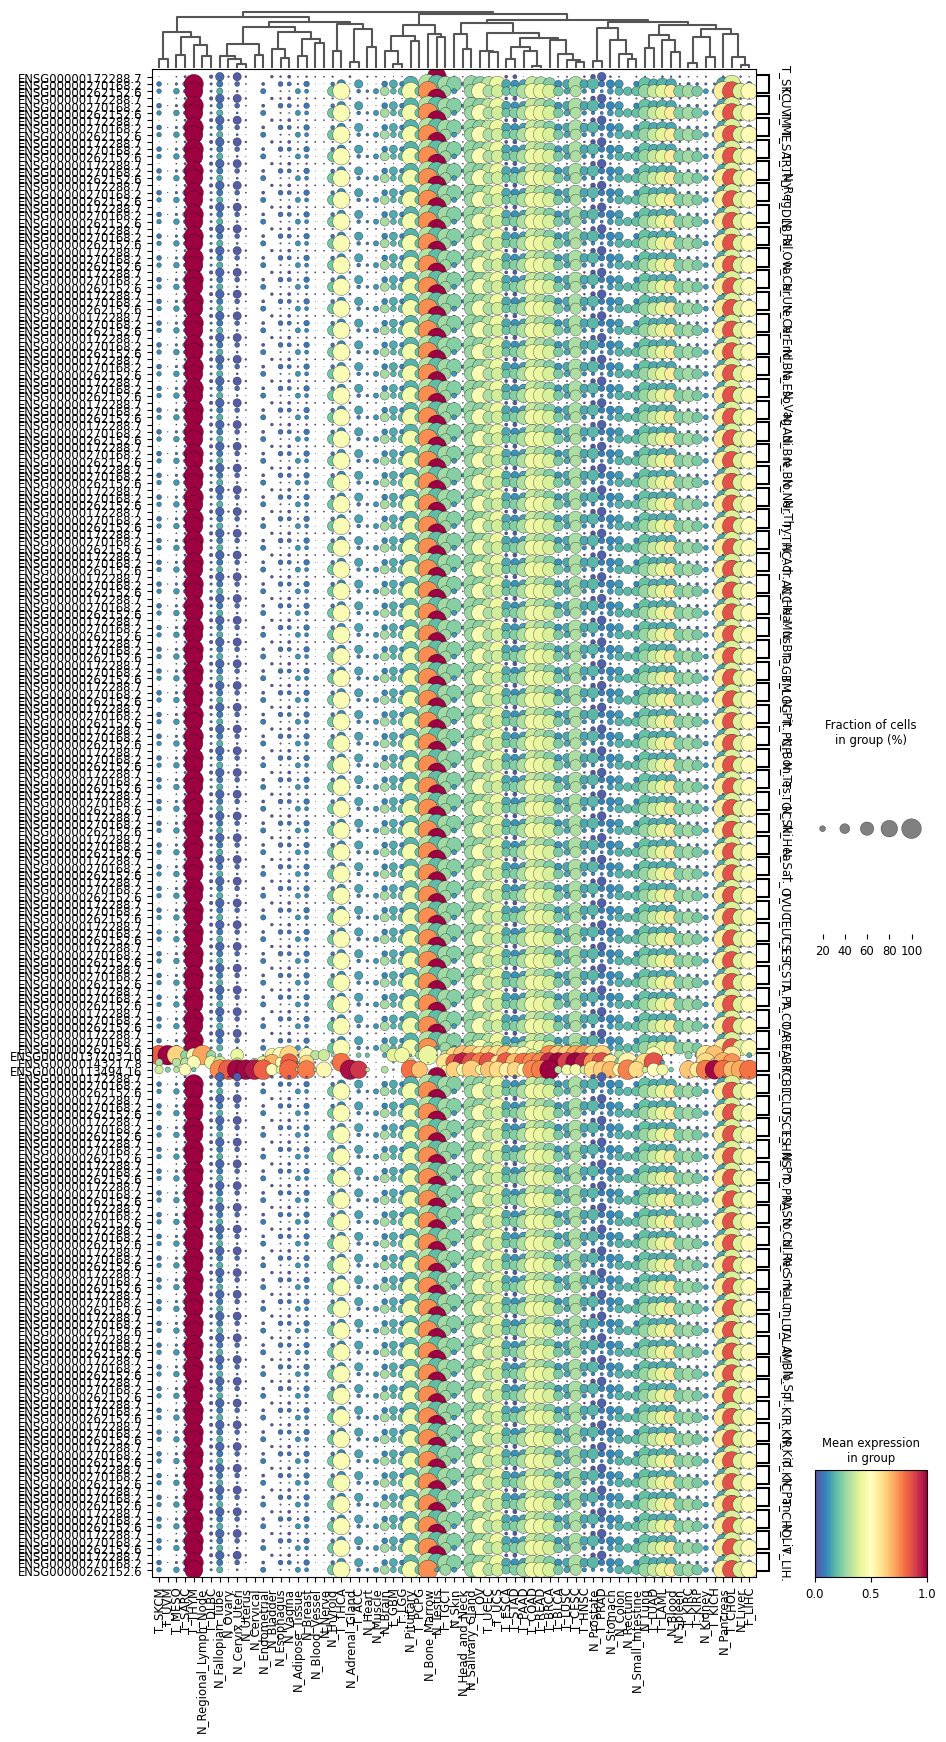

In [34]:
sc.tl.dendrogram(adata,groupby='labels',use_rep='X_svd')
df_tmp=pd.DataFrame(adata.uns['cosg']['names'][:3,]).T
print(df_tmp)

import pandas as pd

# Get the COSG marker genes DataFrame
marker_genes_df = pd.DataFrame(adata.uns['cosg']['names']).T
print(marker_genes_df)
# Ensure "t_brca" is a valid cluster label
if "T_BRCA" in marker_genes_df.index:
    top_10_genes = marker_genes_df.loc["T_BRCA", :10]  # Get the first 10 genes
    print(" Top 10 marker genes for t_brca:")
    print(top_10_genes.tolist())
else:
    print(" Cluster 't_brca' not found in marker genes. Available clusters:")
    print(marker_genes_df.index.tolist())  # Show available cluster names

df_tmp=df_tmp.reindex(adata.uns['dendrogram_'+'labels']['categories_ordered'])
marker_genes_list={idx: list(row.values) for idx, row in df_tmp.iterrows()}
marker_genes_list = {k: v for k, v in marker_genes_list.items() if not any(isinstance(x, float) for x in v)}

sc.pl.dotplot(adata,
              marker_genes_list,
              groupby='labels',
              dendrogram=True,
              swap_axes=True,
              standard_scale='var',
              cmap='Spectral_r',
              figsize=[10,20])

/home/nisma/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nisma/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


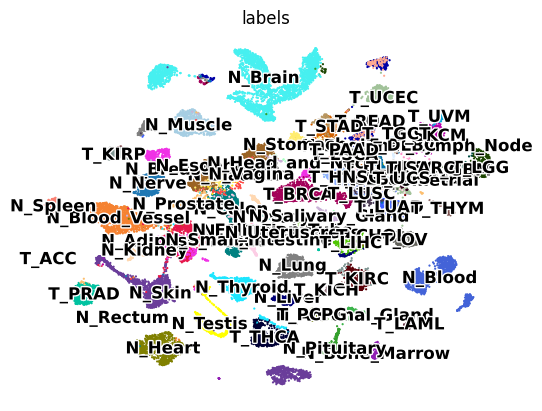

In [29]:
marker_gene=pd.DataFrame(adata.uns['cosg']['names'])

sc.pl.umap(adata,
           color=['labels'],
           palette=piaso.pl.color.d_color4,
           cmap=piaso.pl.color.c_color4,
           legend_fontsize=12,
           legend_fontoutline=2,
           legend_loc='on data',
           size=10,
           frameon=False)